<a href="https://colab.research.google.com/github/OweenCesar/Notebooks/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
salary = pd.read_csv('/content/Salary_dataset.csv', index_col=[0])

In [ ]:
salary.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [ ]:
salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [ ]:
salary.shape

(30, 2)

In [ ]:
salary.isna().sum() # no Nan

,0
YearsExperience,0
Salary,0


In [ ]:
salary.duplicated().sum()

np.int64(0)

In [ ]:
salary.info() # Both are float

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


## Check some visualization of the dataset

---



In [ ]:
# Getting the right number of bins for a better display using the sqrt rule

import numpy as np
bins = int(np.sqrt(len(salary['Salary'])))
print(bins)

5


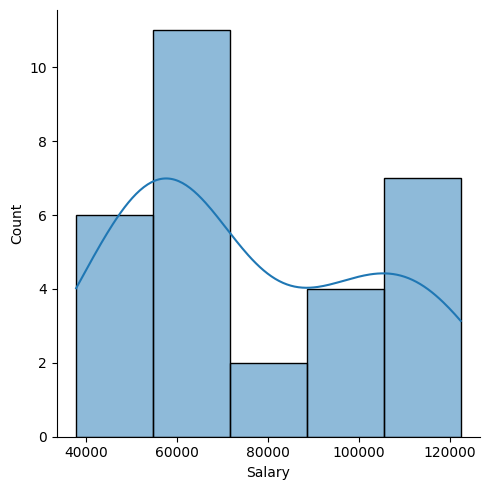

In [ ]:
sns.displot(salary, x='Salary', bins = bins, kde = True)


# We distributed the data into 5 bins
# We can see that the most common salary is located into the range approx. 50k - 75k
#
# we can find two peaks : one over 58k and other on 105k with around seven and 5 counts approx.
# there could be two categories on salaries: junir or senior

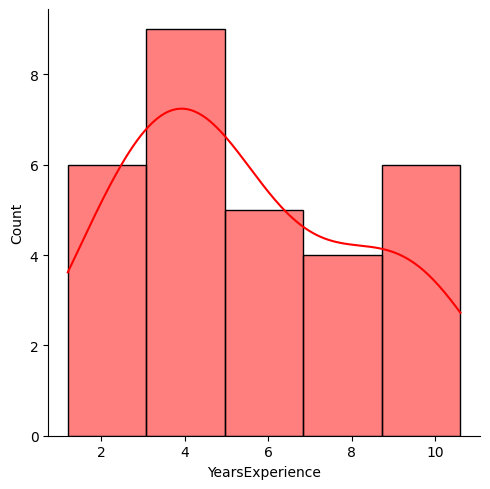

In [ ]:
from math import sqrt
bins2 = int(sqrt(len(salary['YearsExperience'])))

sns.displot(x = 'YearsExperience', data = salary, bins = bins2, kde = True, color = 'red')

# What do we see?
# We can see that the 'years of experience' are divided into 5 bins
# The sqr root was used for calculating the correct numbers of bins
# the highest peak is at approx. 4 years, with a count of around 7.
# The lowest point in density, according to our kde line,is within 10-12 years.

In [ ]:
salary.corr()

#Positive correlation: the higher years of experience, the highest the salaries are

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


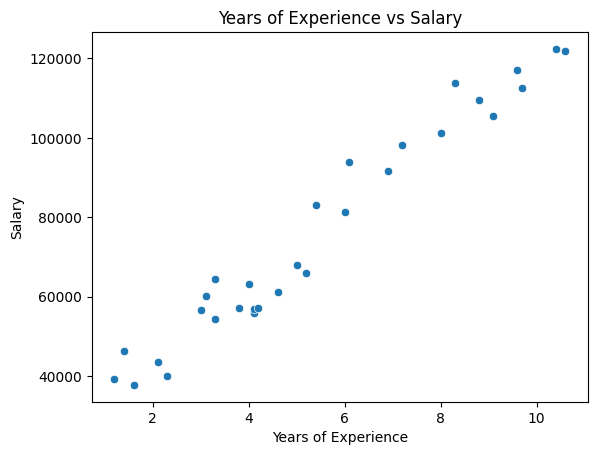

In [ ]:
sns.scatterplot(data= salary, x='YearsExperience', y='Salary')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


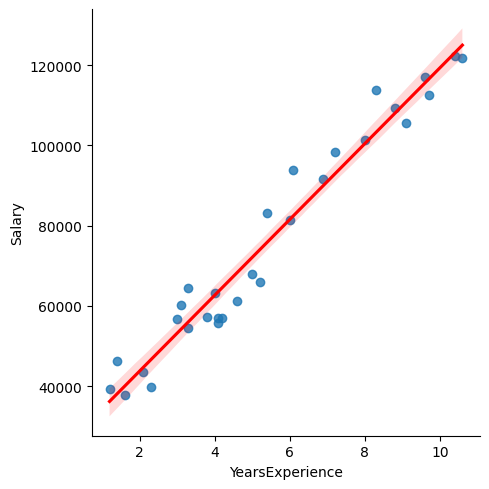

In [ ]:
sns.lmplot(
    data=salary,
    x='YearsExperience',
    y='Salary',
    line_kws={'color': 'red'}  # Regression line color
)

# We can see that:
# - The red line shows a strong positive relationship between salary and years.
# Most of the dots are very close to the red line, meaning that the model fits very well.
# The dataset can be suitable for linear regression.


In [ ]:
# Linear model is : Y = X*W + B

import numpy as np

salary_array = np.array(salary['Salary'])
years = np.array(salary['YearsExperience'])


# Set parameters

b, W1 = 0, 0
learning_rate = 0.01
epochs = 1000
m = len(salary_array)  # number of data points


# Gradient Descent
for _ in range(epochs):

  y_pred = b + W1*years


  # gradients control in which direction we are going to find the local minima

  dw0 = (1/m) * np.sum(y_pred - salary_array)
  dw1 = (1/m) * np.sum((y_pred - salary_array) * years)

  b -= learning_rate * dw0
  W1 -= learning_rate * dw1

  # Update the parameters simultaneously
  b = b - learning_rate * dw0
  W1 = W1 - learning_rate * dw1


In [ ]:
def train_linear_model(X, y, learning_rate = 0.01, epochs = 1000):
  b, W1 = 0, 0
  m = len(X) # number of datapoints
  for _ in range(epochs):
    y_pred = b + W1*X
    dw0 = (1/m) * np.sum(y_pred - y)
    dw1 = (1/m) * np.sum((y_pred - y) * X)

    b = b - learning_rate * dw0
    W1  = W1 - learning_rate * dw1
  return b, W1

In [ ]:
b_param, W1_param = train_linear_model(years, salary_array)

In [ ]:
def prediction_salary(years_experience, w0, w1):
  return w0 + w1*years_experience



In [ ]:
years_test = np.array([15])
predicted_salary = prediction_salary(years, b_param, W1_param)
print(predicted_salary)

[ 33769.56598975  35745.72879067  37721.8915916   42662.2985939
  44638.46139482  51555.03119805  52543.11259851  54519.27539943
  54519.27539943  59459.68240173  61435.84520266  62423.92660312
  62423.92660312  63412.00800358  67364.33360542  71316.65920726
  73292.82200819  75268.98480911  81197.47321187  82185.55461233
  90090.20581602  93054.4500174  100959.10122109 103923.34542247
 108863.75242478 111827.99662616 116768.40362846 117756.48502892
 124673.05483215 126649.21763307]


In [ ]:
salary_array

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

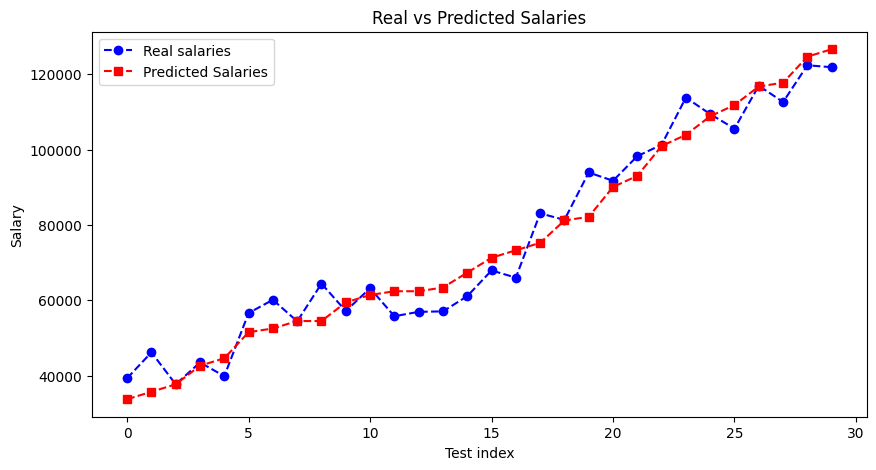

In [ ]:
plt.figure (figsize = (10, 5))

indices = np.arange(len(salary_array))
plt.plot(indices, salary_array, label='Real salaries', marker='o', linestyle = "dashed", color ='blue')
plt.plot(indices, predicted_salary, label = 'Predicted Salaries', marker = 's', linestyle = "dashed", color = 'red')


plt.xlabel("Test index")
plt.ylabel("Salary")
plt.title("Real vs Predicted Salaries")
plt.legend()
plt.show()

In [ ]:
years

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

In [ ]:
salary_array

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


x_train, x_test, y_train, y_test = train_test_split(years, salary_array, random_state = 42, test_size = 0.2)


In [ ]:
model = LinearRegression()
model.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

In [ ]:
predictions = model.predict(x_test.reshape(-1,1))

In [ ]:
predictions

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [ ]:
y_test

array([112636.,  67939., 113813.,  83089.,  64446.,  57190.])

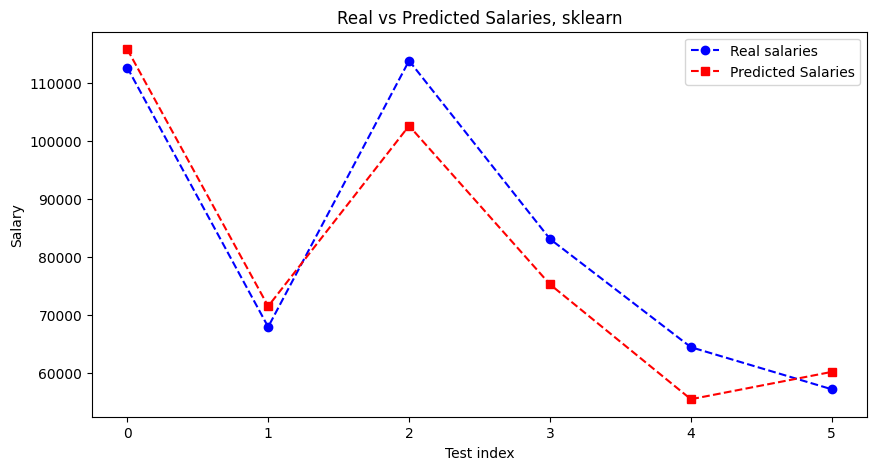

In [ ]:
plt.figure (figsize = (10, 5))

indices = np.arange(len(y_test))
plt.plot(indices, y_test, label='Real salaries', marker='o', linestyle = "dashed", color ='blue')
plt.plot(indices, predictions, label = 'Predicted Salaries', marker = 's', linestyle = "dashed", color = 'red')


plt.xlabel("Test index")
plt.ylabel("Salary")
plt.title("Real vs Predicted Salaries, sklearn")
plt.legend()
plt.show()

In [ ]:
# Main metrics

mse = mean_squared_error(predictions, y_test)
print(mse)

49830096.855908394


In [ ]:
import numpy as np
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:,.2f}")


RMSE: 7,059.04


In [ ]:
import numpy as np
print(np.mean(salary_array))


76004.0


In [ ]:
rmse / np.mean(salary_array)

np.float64(0.09287726464267025)